# Exploring Grand Averages

This notebook provides a means to investigate the grand averages for the YAC study.

Reseachers/students are not intended to make changes here.

In [1]:
import glob
import mne
import numpy as np
import re
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
mne.viz.set_browser_backend('qt')

Using qt as 2D backend.


In [2]:
# Dictionary keyed by condition; values are a list of averaged (mne.Evoked) subject waveforms.
conditions = ['VO21', 'VO22', 'VO23', 'combine']
relabel = {'VO21':'target', 'VO22':'nontarget', 'VO23':'standard', 'combine':'novel'}
averaging_dict = {k:[] for k in conditions}

In [3]:
p3_sites = ['E77', 'E67', 'E72', 'E61', 'E53', 'E86', 'E62', 'E78']
n2_sites = ['E12', 'E11', 'E19', 'E7', 'E6', 'E106', 'E112', 'E5', 'E4', 'E13']
channel_interest = [
    "E4", "E5", "E6", "E7", "E11", "E12", "E13",
    "E19", "E53", "E61", "E62", "E65", "E66", "E67",
    "E69", "E70", "E71", "E72", "E74", "E75", "E76",
    "E77", "E78", "E82", "E83", "E84", "E86", "E89",
    "E90", "E96", "E106", "E112"
]
all_subject_paths = sorted(glob.glob('derivatives/segmented/vo/*.fif'))
for sub in all_subject_paths:
    for condition in conditions:
        new_epoch = mne.read_epochs(sub).pick(channel_interest)
        averaging_dict[condition].append((re.findall(r'_(\d+)_', sub)[0], new_epoch[condition].average()))

Reading /media/tyler/PathstoneProject/PathstoneYAC/derivatives/segmented/vo/yac_1001_pylqcr_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
320 matching events found
No baseline correction applied
0 projection items activated
Reading /media/tyler/PathstoneProject/PathstoneYAC/derivatives/segmented/vo/yac_1001_pylqcr_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
320 matching events found
No baseline correction applied
0 projection items activated
Reading /media/tyler/PathstoneProject/PathstoneYAC/derivatives/segmented/vo/yac_1001_pylqcr_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
320 matching events found
No baseline correction applied
0 projection items activated
Reading /m

Working on:  VO21
Identifying common channels ...


Condition,Grand average (n = 83)
Data kind,average
Timepoints,601 samples
Channels,32 channels
Number of averaged epochs,83
Time range (secs),-0.2 – 1.0
Baseline (secs),-0.200 – 0.000 s


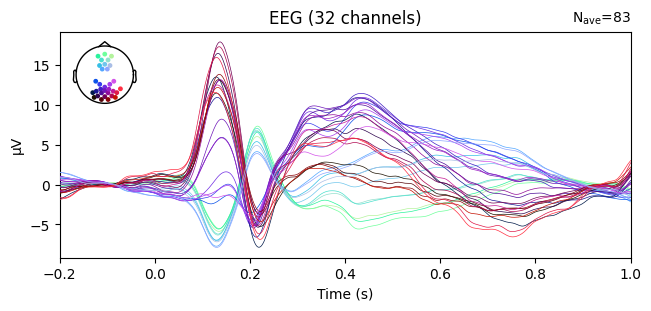

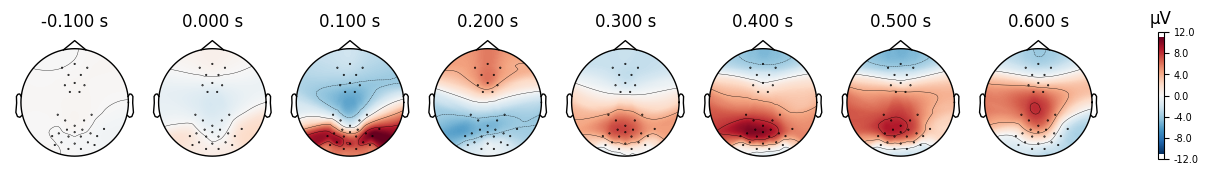

Working on:  VO22
Identifying common channels ...


Condition,Grand average (n = 83)
Data kind,average
Timepoints,601 samples
Channels,32 channels
Number of averaged epochs,83
Time range (secs),-0.2 – 1.0
Baseline (secs),-0.200 – 0.000 s


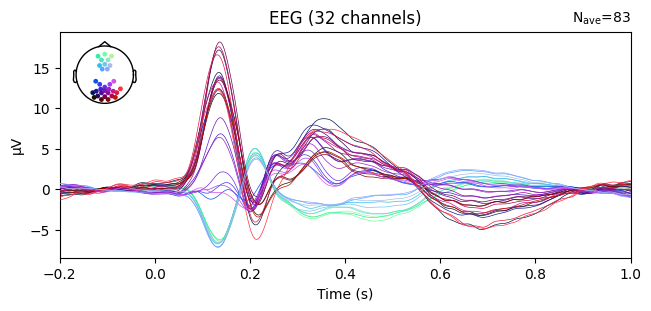

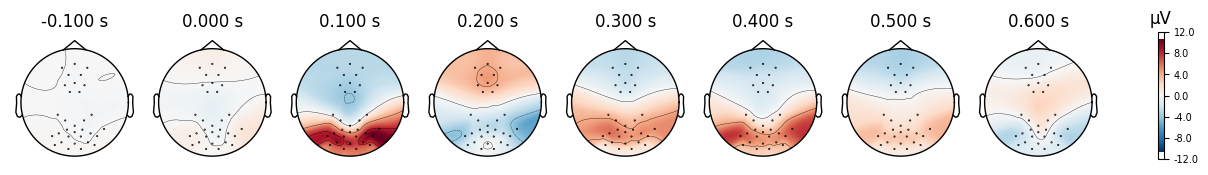

Working on:  VO23
Identifying common channels ...


Condition,Grand average (n = 83)
Data kind,average
Timepoints,601 samples
Channels,32 channels
Number of averaged epochs,83
Time range (secs),-0.2 – 1.0
Baseline (secs),-0.200 – 0.000 s


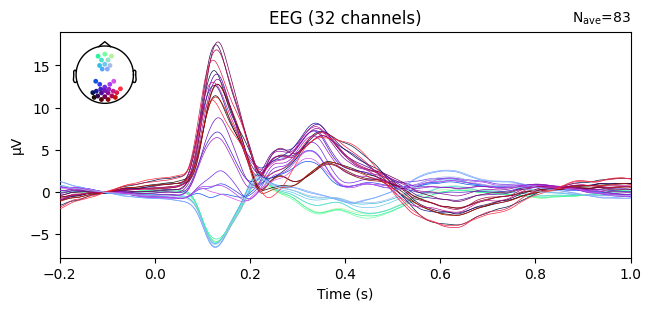

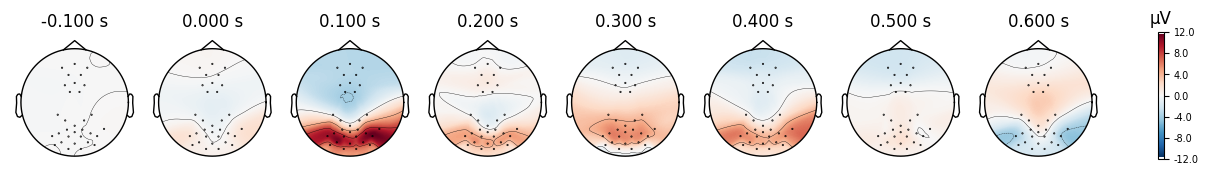

Working on:  combine
Identifying common channels ...


Condition,Grand average (n = 83)
Data kind,average
Timepoints,601 samples
Channels,32 channels
Number of averaged epochs,83
Time range (secs),-0.2 – 1.0
Baseline (secs),-0.200 – 0.000 s


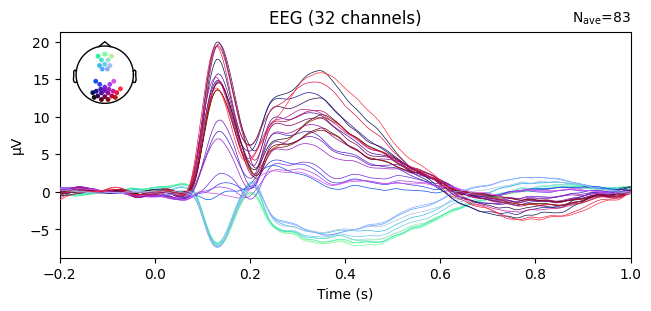

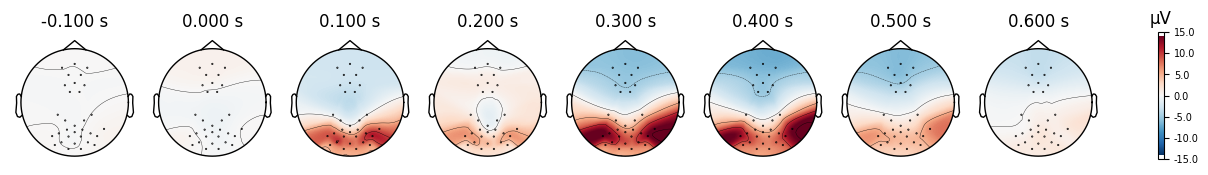

In [4]:
def condition_summary(condition_label):
    print('Working on: ', condition_label)
    grand_average = mne.grand_average([item[1] for item in averaging_dict[condition_label]])
    display(grand_average)
    grand_average.plot()
    times = np.arange(-0.1, .65, .1)
    fig = grand_average.plot_topomap(times=times, colorbar=True)
    fig.suptitle(condition_label)
for condition in conditions:
    condition_summary(condition)

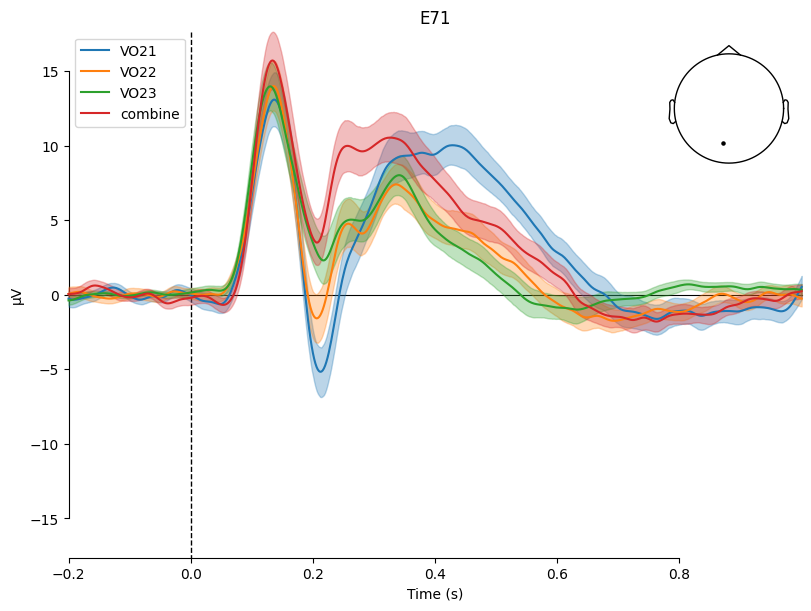

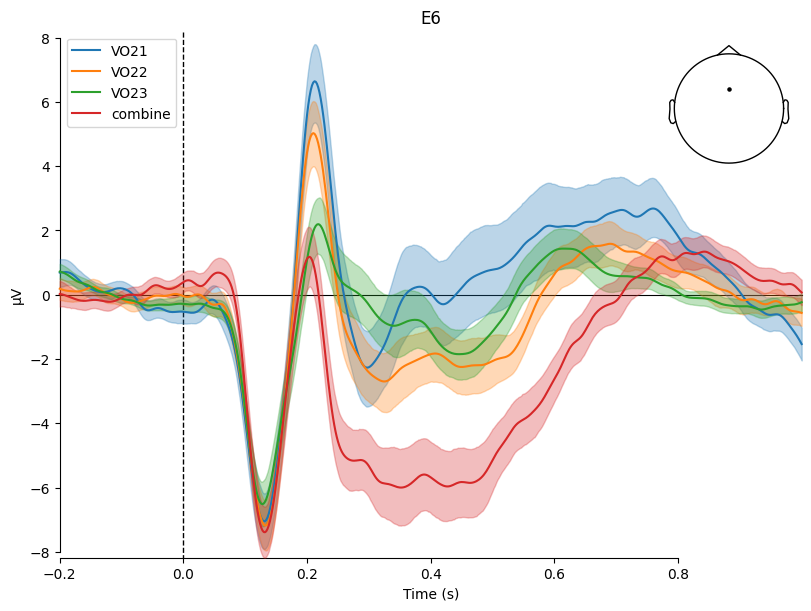

[<Figure size 800x600 with 2 Axes>]

In [5]:
mne.viz.plot_compare_evokeds({k:[t[1] for t in v] for k, v in averaging_dict.items()}, picks=['E71'])
mne.viz.plot_compare_evokeds({k:[t[1] for t in v] for k, v in averaging_dict.items()}, picks=['E6'])